In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [3]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [4]:
rcb_kkr=matches[((matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')) & ((matches.team1=='Kolkata Knight Riders') | (matches.team2=='Kolkata Knight Riders'))]
rcb=matches[(matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')]              
kkr=matches[(matches.team1=='Kolkata Knight Riders') | (matches.team2=='Kolkata Knight Riders')]

In [5]:
rcb_kkrdeli=deliveries[((deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')) & ((deliveries.batting_team=='Kolkata Knight Riders') | (deliveries.bowling_team=='Kolkata Knight Riders'))]
rcbdeli=deliveries[(deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')]              
kkrdeli=deliveries[(deliveries.batting_team=='Kolkata Knight Riders') | (deliveries.bowling_team=='Kolkata Knight Riders')]

# Q1

In [6]:
def plot_helper(df,columns,size,plot_type,color):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color=color,alpha=0.6)
        ax[i].set_title(columns[i])

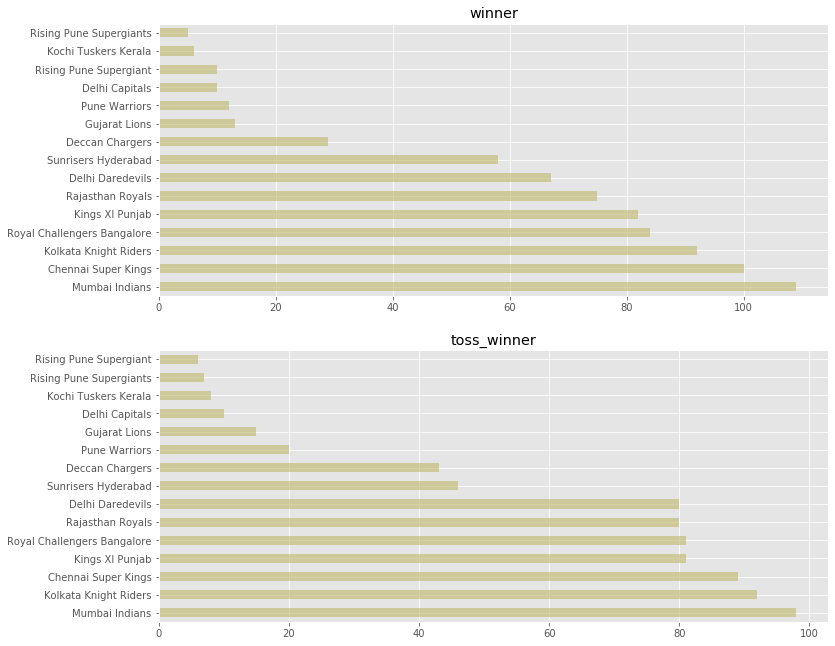

In [7]:

plot_helper(matches,['winner','toss_winner'],(12,11),'barh','DarkKhaki')


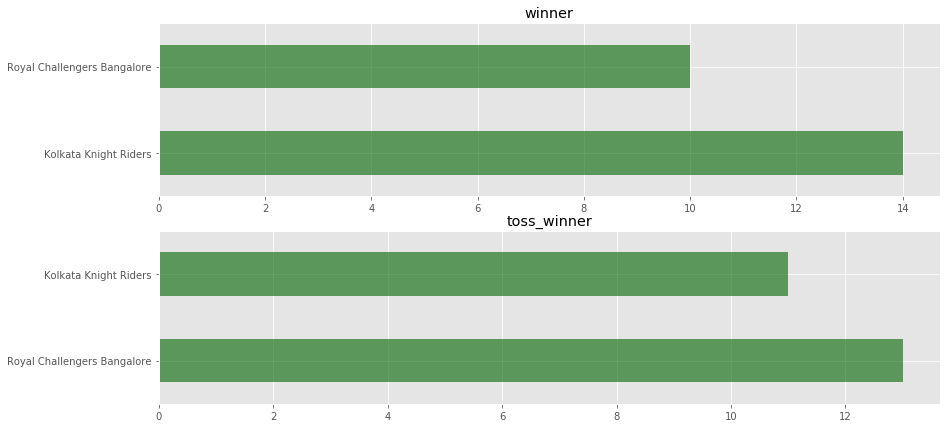

In [8]:
plot_helper(rcb_kkr,['winner','toss_winner'],(14,7),'barh','Darkgreen')

### It's clearly visible that kkr have more wins when compared to rcb but rcb has more toss wins and thats a major factor in winning a match

# Q2

In [9]:
rcb_wickets=rcbdeli.query('over>=6').groupby('match_id').dismissal_kind.count()
rcb_wickets_kkr=rcb_kkrdeli.query('over>=6 & batting_team==\'Royal Challengers Bangalore\'').groupby('match_id').dismissal_kind.count()


In [10]:
rcb_wickets_kkr.describe().iloc[:3]

count    24.000000
mean      4.166667
std       2.098999
Name: dismissal_kind, dtype: float64

In [11]:
rcb_wickets.describe().iloc[:3]

count    179.000000
mean       9.195531
std        2.947248
Name: dismissal_kind, dtype: float64

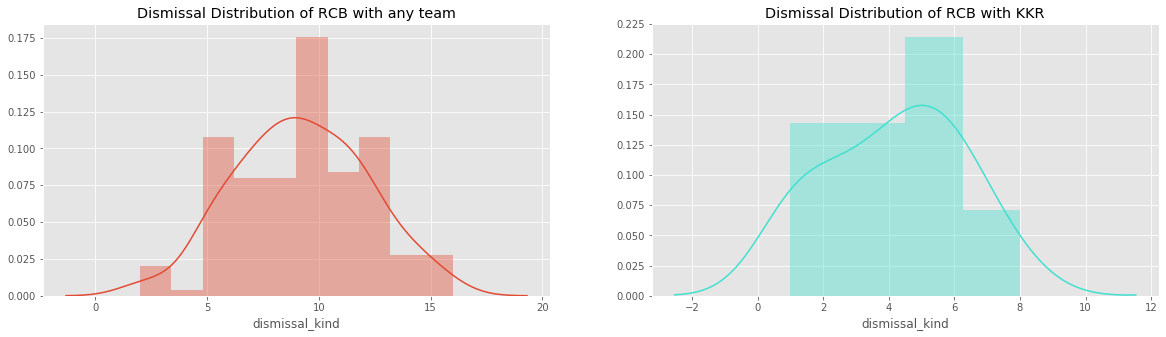

In [12]:
fig,ax=plt.subplots(ncols=2,figsize=(20,5))
ax[1].set_title('Dismissal Distribution of RCB with KKR')
sns.distplot(rcb_wickets,ax=ax[0])
ax[0].set_title('Dismissal Distribution of RCB with any team')
sns.distplot(rcb_wickets_kkr,color='turquoise',ax=ax[1])

### To narrow down our answer instead of just looking at the matches with any possible team we take a specific look at matches between RCB and KKR and can assume that the wickets will be 2-4

# Q3

In [13]:
abde=deliveries[deliveries.batsman.str.contains('AB de Villiers')]
abde.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1688,8,1,Royal Challengers Bangalore,Kings XI Punjab,2,5,AB de Villiers,Vishnu Vinod,Sandeep Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1689,8,1,Royal Challengers Bangalore,Kings XI Punjab,2,6,AB de Villiers,Vishnu Vinod,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1693,8,1,Royal Challengers Bangalore,Kings XI Punjab,3,4,AB de Villiers,Vishnu Vinod,MM Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [14]:
abde.batting_team.unique()

array(['Royal Challengers Bangalore', 'Delhi Daredevils'], dtype=object)

In [15]:
abde[abde.batting_team=='Delhi Daredevils'].shape,abde[abde.batting_team=='Royal Challengers Bangalore'].shape

((582, 21), (2395, 21))

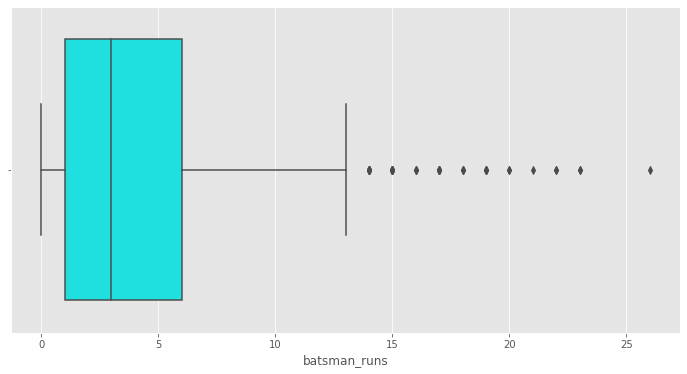

In [16]:
plt.figure(figsize=(12,6))
abde_count=abde.groupby(['match_id','over'],as_index=True).batsman_runs.sum()
sns.boxplot(abde_count,color='aqua')

In [17]:
abde_count.describe()

count    1023.000000
mean        4.328446
std         4.217386
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        26.000000
Name: batsman_runs, dtype: float64

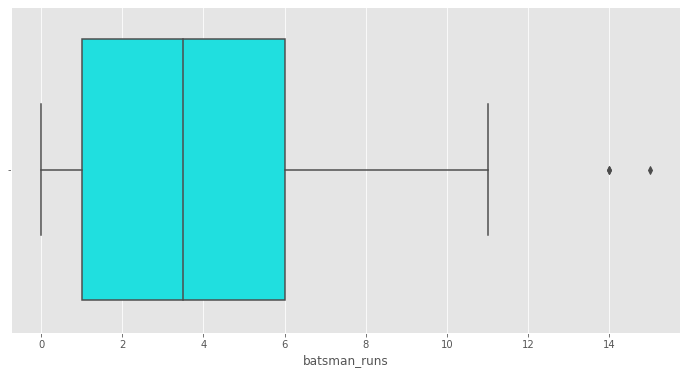

In [18]:
plt.figure(figsize=(12,6))
abde_count_kkr=abde[(abde.batting_team=='Royal Challengers Bangalore') & (abde.bowling_team=='Kolkata Knight Riders')].groupby(['match_id','over']).batsman_runs.sum()
sns.boxplot(abde_count_kkr,color='aqua')

In [19]:
abde_count_kkr.describe()

count    78.000000
mean      4.064103
std       3.431480
min       0.000000
25%       1.000000
50%       3.500000
75%       6.000000
max      15.000000
Name: batsman_runs, dtype: float64

In [20]:
abde_count.mean()*7

30.299120234604104

In [21]:
abde_count_kkr.mean()*8

32.51282051282051

In [22]:
over=6
over*8

48

### As we can see from the above analysis that ab de villiers scores a bit more than 4 runs in a single over so we can assume that he will score around 32 in 48 balls.

# Q4

In [62]:
eoin_strike=deliveries[deliveries.batsman.str.contains('EJG Morgan')].pivot_table(index='match_id',
                                                                                  aggfunc=['count','sum'],
                                                                                  values=['ball','batsman_runs'])
eoin_strike.head()

count               sum             
          ball batsman_runs ball batsman_runs
match_id                                     
15          20           20   67           22
19          17           17   61           13
32          21           21   61           26
54           4            4   18            4
178          7            7   19           10

In [63]:
eoin_strike_rcb=rcb_kkrdeli[rcb_kkrdeli.batsman.str.contains('EJG Morgan')].pivot_table(index='match_id',
                                                                                  aggfunc=['count','sum'],
                                                                                  values=['ball','batsman_runs'])
eoin_strike_rcb.head()

count               sum             
          ball batsman_runs ball batsman_runs
match_id                                     
178          7            7   19           10
258          6            6   24            6
291          5            5   13            2
392          5            5   18            2

In [64]:
eoin=(eoin_strike['sum','batsman_runs']/eoin_strike['count','ball']*100)
eoin.describe()

count     45.000000
mean     102.772298
std       51.375826
min        0.000000
25%       76.470588
50%      100.000000
75%      125.000000
max      242.857143
dtype: float64

In [81]:
eoin_rcb=(eoin_strike_rcb['sum','batsman_runs']/eoin_strike_rcb['count','ball']*100)
eoin_rcb.describe()

count      4.000000
mean      80.714286
std       50.163000
min       40.000000
25%       40.000000
50%       70.000000
75%      110.714286
max      142.857143
dtype: float64

Text(0.5, 1.0, 'Eoin overall Strike rate')

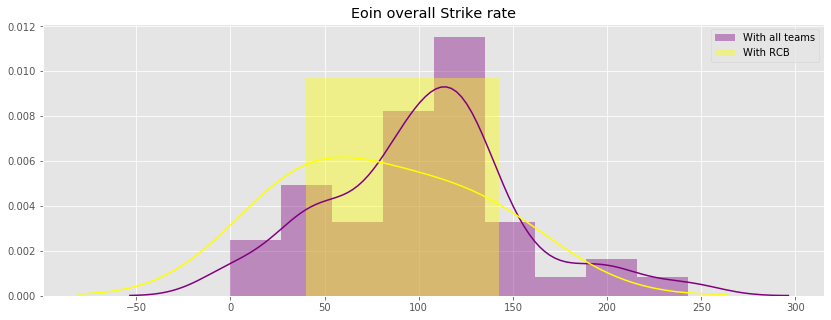

In [84]:
plt.figure(figsize=(14,5))
sns.distplot(eoin,color='purple')
sns.distplot(eoin_rcb,color='yellow')
plt.legend(['With all teams','With RCB'])
plt.title('Eoin overall Strike rate')
#plt.xlim([0,100])

In [121]:
#deliveries[deliveries.batsman.str.contains('EJG Morgan')].groupby('match_id').count().sort_values(['over','ball'],ascending=False).head(7)
eoin_7=deliveries[(deliveries.batsman.str.contains('EJG Morgan')) & ((deliveries.over>=19) & (deliveries.over<=20))].sort_values(['over','ball'],ascending=False)
eoin_7.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
61013,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,7,EJG Morgan,MK Tiwary,S Aravind,0,...,0,0,0,0,0,0,0,EJG Morgan,run out,AB de Villiers
61012,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,6,EJG Morgan,MK Tiwary,S Aravind,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
137263,580,2,Sunrisers Hyderabad,Royal Challengers Bangalore,20,6,EJG Morgan,KV Sharma,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
99170,418,2,Kolkata Knight Riders,Chennai Super Kings,20,5,EJG Morgan,YK Pathan,CH Morris,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61010,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,4,EJG Morgan,YK Pathan,S Aravind,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [133]:
eoin_7.groupby(['match_id','over','ball'],as_index=False).sum().sort_values(['over','ball'],ascending=False)

,match_id,over,ball,inning,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
6,258,20,7,1,0,0.0,0,0,0,0,0,0,0
5,258,20,6,1,0,0.0,0,0,0,0,2,0,2
37,580,20,6,2,0,0.0,0,0,0,0,1,0,1
25,418,20,5,2,0,0.0,0,0,0,0,1,0,1
4,258,20,4,1,0,0.0,0,0,0,0,1,0,1
24,418,20,4,2,0,0.0,0,0,0,0,0,0,0
32,551,20,3,1,0,0.0,0,0,0,0,1,0,1
23,418,20,2,2,0,0.0,0,0,0,0,1,0,1
22,418,20,1,2,0,0.0,0,0,0,0,0,0,0
31,551,20,1,1,0,0.0,0,0,0,0,1,0,1


# Q5

In [150]:
rcb_death=rcb_kkrdeli.query('batting_team=="Royal Challengers Bangalore" & over>=15').groupby(['match_id'],as_index=False).sum().total_runs
rcb_death.describe().iloc[:3]

count    21.000000
mean     55.761905
std      21.447389
Name: total_runs, dtype: float64

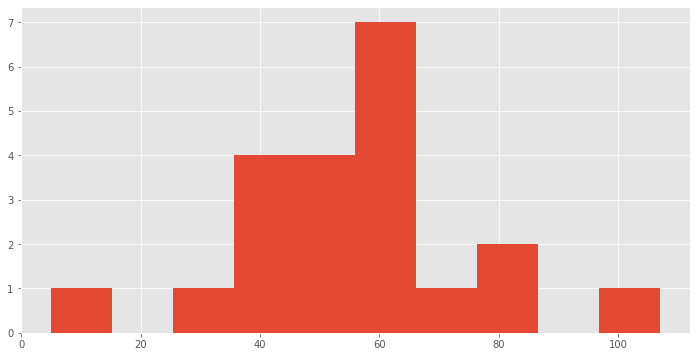

In [152]:
rcb_death.hist(figsize=(12,6))

### It is evident from the above analysis that RCB will score around 40-60 runs in the death over